# Clustering on the Satellite Observations Dataset

Soil Moisture Dataset

Libraries we need are imported first

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import xarray as xr
from scipy.interpolate import griddata
from scipy import interpolate
import statsmodels.api as sm
from sklearn.cluster import KMeans

Data is structured as described in the previous sections

In [125]:
thefile = '../../../DATA/TPdata_199301'
data = pd.read_csv(thefile, sep='\t', header=None)
data.columns = ["cellNr", "latitude", "longitude", "backscatter","emissivity_v","emissivity_h","ts_amplitude","ndvi","lmd_soilWetness"]
data = data.replace('   NaN',pd.NA)
data['backscatter'] = pd.to_numeric(data['backscatter'])
data['emissivity_v'] = pd.to_numeric(data['emissivity_v'])
data['emissivity_h'] = pd.to_numeric(data['emissivity_h'])
data['ts_amplitude'] = pd.to_numeric(data['ts_amplitude'])
data['ndvi'] = pd.to_numeric(data['ndvi'])
data['lmd_soilWetness'] = pd.to_numeric(data['lmd_soilWetness'])
data = data.dropna()

Data preparation

In [128]:
back = data['backscatter'].values
lats = data['latitude'].values
lons = data['longitude'].values
emissivity_v = data['emissivity_v'].values
emissivity_h = data['emissivity_h'].values
ts_amplitude = data['ts_amplitude'].values
ndvi = data['ndvi'].values
lmd_soilWetness = data['lmd_soilWetness'].values
Yi = np.linspace(np.min(lats.data),float(np.max(lats.data)),180)
Xi = np.linspace(np.min(lons.data),float(np.max(lons.data)),360)
X, Y = np.meshgrid(Xi,Yi)
points = list(zip(lons, lats))
back_gridded = griddata(points, back, (X, Y), method='nearest')
emissivity_v_gridded = griddata(points, emissivity_v, (X, Y), method='nearest')
emissivity_h_gridded = griddata(points, emissivity_h, (X, Y), method='nearest')
ts_amplitude_gridded = griddata(points, ts_amplitude, (X, Y), method='nearest')
ndvi_gridded = griddata(points, ndvi, (X, Y), method='nearest')
lmd_soilWetness_gridded = griddata(points, lmd_soilWetness, (X, Y), method='nearest')

## Clustering

In [131]:
Xmeans = data[['ts_amplitude','ndvi','backscatter']]

We use the K-Means algorithm in this section to perform a clustering analysis of the dataset

In [134]:
IDX = KMeans(n_clusters=10, random_state=0, n_init="auto").fit_predict(Xmeans)
len(IDX)

44531

In [136]:
data['IDX']=IDX
IDX_values = data['IDX'].values
IDX_gridded = griddata(points, IDX_values, (X, Y), method='nearest')

(-90.0, 90.0)

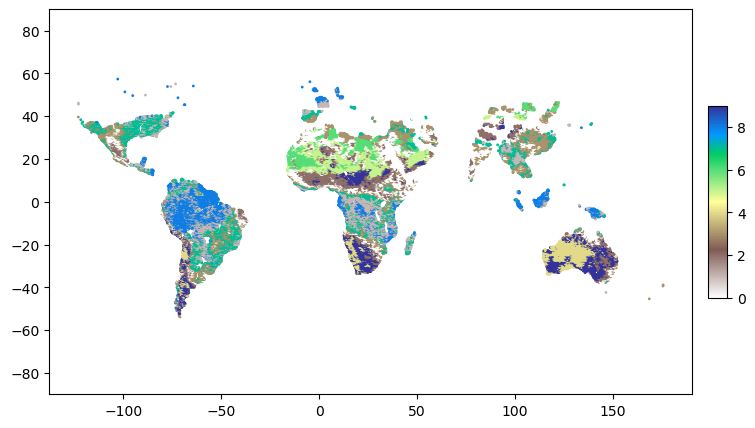

In [138]:
fig,ax = pl.subplots(figsize=(10, 5))
mesh = ax.scatter(data['longitude'],data['latitude'],c=IDX,s=1, cmap='terrain_r');
cbar = pl.colorbar(mesh, ax=ax, shrink=.5, pad=.02, aspect=10)
ax.set_ylim(-90,90)

(-90.0, 90.0)

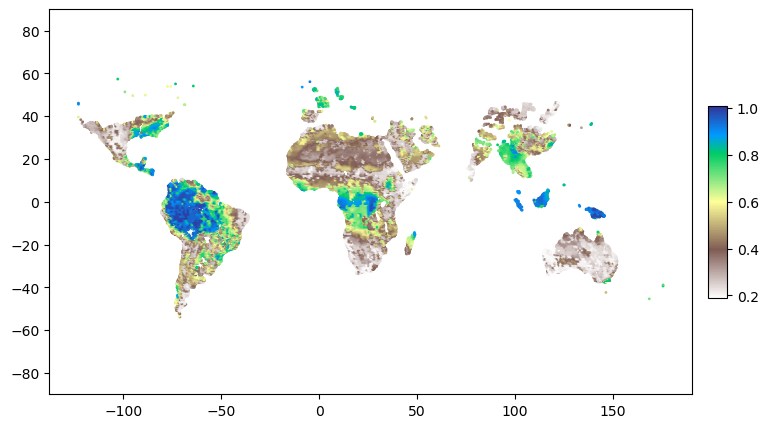

In [140]:
fig,ax = pl.subplots(figsize=(10, 5))
mesh = ax.scatter(data['longitude'],data['latitude'],c=lmd_soilWetness,s=1, cmap='terrain_r');
cbar = pl.colorbar(mesh, ax=ax, shrink=.5, pad=.02, aspect=10)
ax.set_ylim(-90,90)

In [142]:
# diff=(IDX/10)-lmd_soilWetness
# diff

array([-0.1771, -0.2946,  0.3684, ..., -0.7286, -0.1225,  0.001 ])

(-90.0, 90.0)

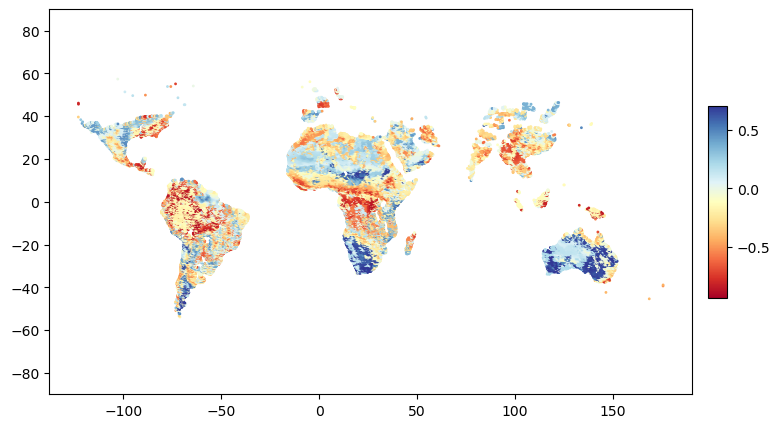

In [144]:
# fig,ax = pl.subplots(figsize=(10, 5))
# mesh = ax.scatter(data['longitude'],data['latitude'],c=diff,s=1, cmap='RdYlBu');
# cbar = pl.colorbar(mesh, ax=ax, shrink=.5, pad=.02, aspect=10)
# ax.set_ylim(-90,90)

In [146]:
data

,cellNr,latitude,longitude,backscatter,emissivity_v,emissivity_h,ts_amplitude,ndvi,lmd_soilWetness,IDX
63715,63716.0,-53.875,-71.0247,-11.7482,0.8083,0.6605,22.8432,0.4072,0.4771,3
65425,65426.0,-53.375,-71.4552,-11.6666,0.8497,0.7343,24.4724,0.1540,0.5946,3
68907,68908.0,-52.375,-71.4676,-15.0033,0.9559,0.9072,36.5638,0.4047,0.5316,9
68908,68909.0,-52.375,-71.0580,-16.3849,0.9428,0.8842,39.3991,0.4233,0.4172,9
70678,70679.0,-51.875,-71.4736,-17.0347,0.9955,0.9738,40.4082,0.2735,0.4525,9
...,...,...,...,...,...,...,...,...,...,...
596855,596856.0,53.875,-75.6890,-11.6752,0.9700,0.8773,9.6753,0.0110,0.6116,1
597727,597728.0,54.125,-64.1943,-11.1028,0.9802,0.8938,5.9767,0.0020,0.8028,8
601035,601036.0,55.125,-73.2685,-12.4459,1.0079,0.9262,12.8538,-0.0140,0.8286,1
604434,604435.0,56.125,-4.7073,-9.9505,0.9586,0.9155,5.0433,0.1880,0.9225,8


In [176]:
data[data['IDX'] == 2] 


,cellNr,latitude,longitude,backscatter,emissivity_v,emissivity_h,ts_amplitude,ndvi,lmd_soilWetness,IDX
73373,73374.0,-51.125,-71.0841,-15.0929,1.0029,0.9564,34.0885,0.2140,0.2077,2
74277,74278.0,-50.875,-72.6733,-13.0173,0.9728,0.9252,33.8676,0.3631,0.3679,2
74280,74281.0,-50.875,-71.4851,-15.3758,0.9881,0.9418,33.5860,0.2251,0.2152,2
74281,74282.0,-50.875,-71.0891,-14.6431,0.9981,0.9542,32.4869,0.2000,0.2076,2
77956,77957.0,-49.875,-72.7371,-13.7268,0.8999,0.8123,35.4797,0.1320,0.4314,2
...,...,...,...,...,...,...,...,...,...,...
533512,533513.0,38.125,92.9391,-9.7985,0.9578,0.8646,30.6317,0.0584,0.4126,2
533514,533515.0,38.125,93.5746,-10.8707,0.9652,0.8782,31.1985,0.0752,0.4420,2
536898,536899.0,38.875,93.6128,-11.2956,0.9606,0.8819,31.0862,0.1022,0.3697,2
541382,541383.0,39.875,102.7873,-14.2536,0.9891,0.8457,30.7242,0.0795,0.2643,2
